In [0]:
import random
import os
import zipfile
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from shutil import copyfile

In [2]:
#Mount GDrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
BASE_SOURCE_DIR = "/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/dataset/"
BASE_SOURCE_DIR_IMAGES = BASE_SOURCE_DIR+"/Images/Training/"
BASE_SOURCE_DIR_IMAGES_VAL = BASE_SOURCE_DIR+"/Images/Validation/"

# try:
#   os.mkdir(BASE_SOURCE_DIR+"Images")
#   os.mkdir(BASE_SOURCE_DIR_IMAGES)
#   os.mkdir(BASE_SOURCE_DIR_IMAGES_VAL)
# except:
#   pass

food = ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
        'creme_brulee', 'cup_cakes', 'donuts', 'frozen_yogurt', 'hummus', 'ice_cream', 'macarons', 'pancakes', 'panna_cotta', 'red_velvet_cake',
        'strawberry_shortcake', 'tiramisu', 'waffles']

# for food in food:
#     try:
#       os.mkdir(BASE_SOURCE_DIR_IMAGES+food)
#       os.mkdir(BASE_SOURCE_DIR_IMAGES_VAL+food)
#     except:
#       continue

In [0]:
# SOURCE_DIR_ARR = [os.path.join(BASE_SOURCE_DIR, food) for food in food]

# TRAINING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES, food) for food in food]
                    
# TESTING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,food) for food in food]

# SOURCE_DIR_ARR = [os.path.join(BASE_SOURCE_DIR,'apple_pie'), os.path.join(BASE_SOURCE_DIR,'baklava'), os.path.join(BASE_SOURCE_DIR,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR,'bread_pudding'), os.path.join(BASE_SOURCE_DIR,'carrot_cake'),os.path.join(BASE_SOURCE_DIR,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR,'churros'),
#                  os.path.join(BASE_SOURCE_DIR,'creme_brulee'), os.path.join(BASE_SOURCE_DIR,'cup_cakes'), os.path.join(BASE_SOURCE_DIR,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR,'hummus'), os.path.join(BASE_SOURCE_DIR,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR,'macarons'), os.path.join(BASE_SOURCE_DIR,'pancakes'), os.path.join(BASE_SOURCE_DIR,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR,'tiramisu'), 
#                  os.path.join(BASE_SOURCE_DIR,'waffles')]

# TRAINING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES,'apple_pie'), os.path.join(BASE_SOURCE_DIR_IMAGES,'baklava'), os.path.join(BASE_SOURCE_DIR_IMAGES,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'bread_pudding'), os.path.join(BASE_SOURCE_DIR_IMAGES,'carrot_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR_IMAGES,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR_IMAGES,'churros'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'creme_brulee'), os.path.join(BASE_SOURCE_DIR_IMAGES,'cup_cakes'), os.path.join(BASE_SOURCE_DIR_IMAGES,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR_IMAGES,'hummus'), os.path.join(BASE_SOURCE_DIR_IMAGES,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'macarons'), os.path.join(BASE_SOURCE_DIR_IMAGES,'pancakes'), os.path.join(BASE_SOURCE_DIR_IMAGES,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR_IMAGES,'tiramisu'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES,'waffles')]
                    
# TESTING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'apple_pie'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'baklava'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'beignets'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'bread_pudding'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'carrot_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'cheesecake'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'chocolate_cake'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'chocolate_mousse'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'churros'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'creme_brulee'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'cup_cakes'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'donuts'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'frozen_yogurt'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'hummus'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'ice_cream'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'macarons'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'pancakes'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'panna_cotta'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'red_velvet_cake'),os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'strawberry_shortcake'), os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'tiramisu'),
#                  os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,'waffles')]

# #MARK - Dividing data method
# #============================================================================================================
# #External Params:
# #Source     : String = Direktori untuk masing" kelas source, digunakan sebagai tempat foto sebelum di split.
# #TRAINING   : String = Direktori akhir TRAINING untuk masing" kelas.
# #VALIDATION : String = DIrektori AKHIR Testing untuk masing" Kelas.
# #SPLIT_SIZE : Double = Menentukan persentase pembagian data source ke 2 directory di atas.
# #============================================================================================================
# def divide_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    
#     #Creating Limiter
#     Shuffled = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
#     SIZE = len(Shuffled)
#     SPLIT_BOUNDARIES = SIZE * SPLIT_SIZE
#     SPLIT_BOUNDARIES = round(SPLIT_BOUNDARIES)
    
#     #Copy the divided source files to the training directory
#     src_training_files = Shuffled[:SPLIT_BOUNDARIES]
#     for training_file in src_training_files:
#         full_training_file = os.path.join(SOURCE,training_file)
#         if os.path.isfile(full_training_file):
#             if os.path.getsize(full_training_file)!=0:
#                 destination_dir = shutil.copy(full_training_file,TRAINING)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((200, 200))
#                 new_image.save(destination_dir)
               
                
#     #Copy the divided source files to the training directory           
#     src_testing = Shuffled[SPLIT_BOUNDARIES:] 
#     for testing_file in src_testing:
#         full_testing_file = os.path.join(SOURCE,testing_file)
#         if os.path.isfile(full_testing_file):
#             if os.path.getsize(full_testing_file)!=0:
#                 destination_dir = shutil.copy(full_testing_file,VALIDATION)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((200, 200))
#                 new_image.save(destination_dir)

# CLASS_SIZE = len(SOURCE_DIR_ARR)
# SPLIT_SIZE = .8

# for index in range(CLASS_SIZE):
#     divide_data(SOURCE_DIR_ARR[index], TRAINING_DIR_ARR[index], TESTING_DIR_ARR[index],SPLIT_SIZE)

# print(len(os.listdir(SOURCE_DIR_ARR[0])))
# print(len(os.listdir(TRAINING_DIR_ARR[0])))
# print(len(os.listdir(TESTING_DIR_ARR[0])))

# 1: Inception 1: Training (53.8), Validation (62.5) - Underfit, need more epoch and less regularization -> Fixed in Inception 2

In [5]:
#source: https://www.kaggle.com/etugoluk/food-classification-inceptionnet with modifications
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

target_size = 300

incnet = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(target_size, target_size, 3)))
incnet.trainable = False
x = incnet.output
x = layers.AveragePooling2D(pool_size=(8, 8))(x)
x = layers.Dropout(.2)(x)
x = layers.Flatten()(x)
output = layers.Dense(22, activation='softmax', kernel_regularizer=regularizers.l2(.0005))(x)
nel_regularizer=regularizers.l2(.0005)(x)

model = models.Model(inputs=incnet.input, outputs=output)
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=800,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=200,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


In [13]:
history = model.fit(train_generator,
                     epochs=5,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/5
22/22 [==============================] - 2593s 118s/step - loss: 2.5971 - accuracy: 0.2685 - val_loss: 2.0806 - val_accuracy: 0.4966
Epoch 2/5
22/22 [==============================] - 429s 20s/step - loss: 2.0814 - accuracy: 0.4389 - val_loss: 1.7136 - val_accuracy: 0.5566
Epoch 3/5
22/22 [==============================] - 429s 19s/step - loss: 1.8352 - accuracy: 0.4939 - val_loss: 1.5212 - val_accuracy: 0.5882
Epoch 4/5
22/22 [==============================] - 430s 20s/step - loss: 1.7043 - accuracy: 0.5181 - val_loss: 1.4097 - val_accuracy: 0.6159
Epoch 5/5
22/22 [==============================] - 427s 19s/step - loss: 1.6218 - accuracy: 0.5377 - val_loss: 1.3511 - val_accuracy: 0.6245


Text(0.5, 1.0, 'Training and validation loss')

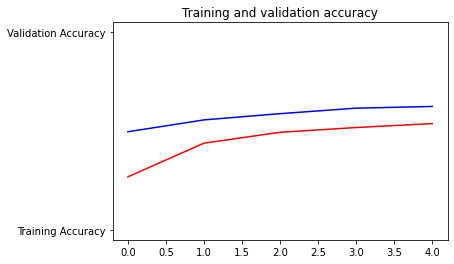

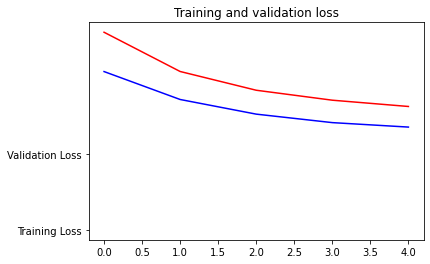

In [15]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_01.h5")

# 2: Inception 2: Training (), Validation ()

In [18]:
#Inception 1 but target_size=299, epoch=10, without regularization

target_size = 299

incnet = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(target_size, target_size, 3)))
incnet.trainable = False
x = incnet.output
x = layers.AveragePooling2D(pool_size=(8, 8))(x)
x = layers.Flatten()(x)
output = layers.Dense(22, activation='softmax')(x)

model = models.Model(inputs=incnet.input, outputs=output)
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=800,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=200,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


In [20]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 419s 19s/step - loss: 2.6080 - accuracy: 0.2778 - val_loss: 1.9941 - val_accuracy: 0.4884
Epoch 2/10
22/22 [==============================] - 413s 19s/step - loss: 1.9088 - accuracy: 0.4853 - val_loss: 1.5504 - val_accuracy: 0.5714
Epoch 3/10
22/22 [==============================] - 414s 19s/step - loss: 1.6556 - accuracy: 0.5337 - val_loss: 1.3774 - val_accuracy: 0.6182
Epoch 4/10
22/22 [==============================] - 411s 19s/step - loss: 1.5487 - accuracy: 0.5531 - val_loss: 1.3117 - val_accuracy: 0.6302
Epoch 5/10
22/22 [==============================] - 416s 19s/step - loss: 1.4669 - accuracy: 0.5744 - val_loss: 1.2381 - val_accuracy: 0.6466
Epoch 6/10
22/22 [==============================] - 417s 19s/step - loss: 1.4219 - accuracy: 0.5868 - val_loss: 1.2069 - val_accuracy: 0.6464
Epoch 7/10
22/22 [==============================] - 418s 19s/step - loss: 1.3864 - accuracy: 0.5909 - val_loss: 1.1683 - val_accuracy: 0.6605
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

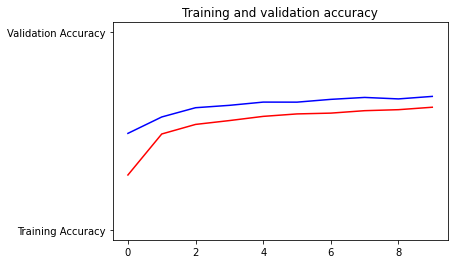

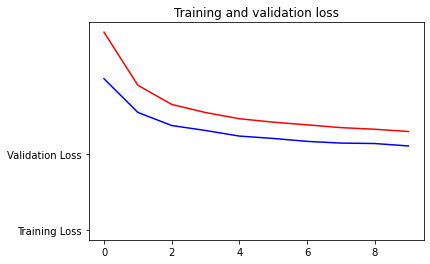

In [21]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02.h5")

In [0]:
#continue training
model = tf.keras.models.load_model('/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02.h5')

In [24]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 413s 19s/step - loss: 1.2740 - accuracy: 0.6212 - val_loss: 1.0958 - val_accuracy: 0.6791
Epoch 2/10
22/22 [==============================] - 400s 18s/step - loss: 1.2650 - accuracy: 0.6265 - val_loss: 1.0833 - val_accuracy: 0.6816
Epoch 3/10
22/22 [==============================] - 397s 18s/step - loss: 1.2505 - accuracy: 0.6269 - val_loss: 1.0763 - val_accuracy: 0.6832
Epoch 4/10
22/22 [==============================] - 396s 18s/step - loss: 1.2305 - accuracy: 0.6328 - val_loss: 1.0618 - val_accuracy: 0.6884
Epoch 5/10
22/22 [==============================] - 393s 18s/step - loss: 1.2173 - accuracy: 0.6403 - val_loss: 1.0602 - val_accuracy: 0.6807
Epoch 6/10
22/22 [==============================] - 391s 18s/step - loss: 1.2129 - accuracy: 0.6376 - val_loss: 1.0580 - val_accuracy: 0.6891
Epoch 7/10
22/22 [==============================] - 390s 18s/step - loss: 1.1968 - accuracy: 0.6425 - val_loss: 1.0416 - val_accuracy: 0.6902
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

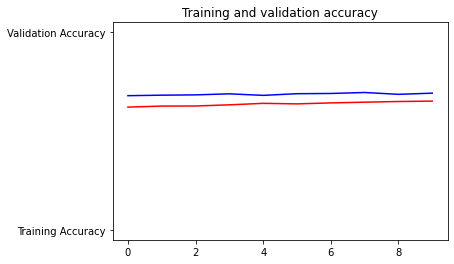

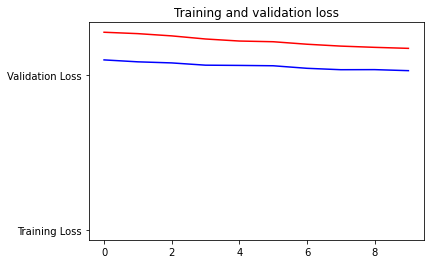

In [25]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-2.h5")

In [27]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 400s 18s/step - loss: 1.1596 - accuracy: 0.6531 - val_loss: 1.0220 - val_accuracy: 0.6936
Epoch 2/10
22/22 [==============================] - 405s 18s/step - loss: 1.1499 - accuracy: 0.6561 - val_loss: 1.0135 - val_accuracy: 0.6982
Epoch 3/10
22/22 [==============================] - 408s 19s/step - loss: 1.1505 - accuracy: 0.6556 - val_loss: 1.0088 - val_accuracy: 0.7020
Epoch 4/10
22/22 [==============================] - 407s 18s/step - loss: 1.1424 - accuracy: 0.6567 - val_loss: 1.0067 - val_accuracy: 0.6989
Epoch 5/10
22/22 [==============================] - 407s 19s/step - loss: 1.1268 - accuracy: 0.6616 - val_loss: 1.0061 - val_accuracy: 0.6998
Epoch 6/10
22/22 [==============================] - 408s 19s/step - loss: 1.1291 - accuracy: 0.6639 - val_loss: 1.0007 - val_accuracy: 0.6998
Epoch 7/10
22/22 [==============================] - 406s 18s/step - loss: 1.1124 - accuracy: 0.6673 - val_loss: 0.9947 - val_accuracy: 0.6998
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

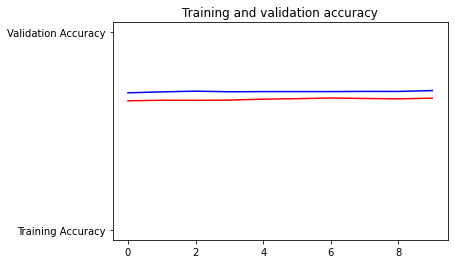

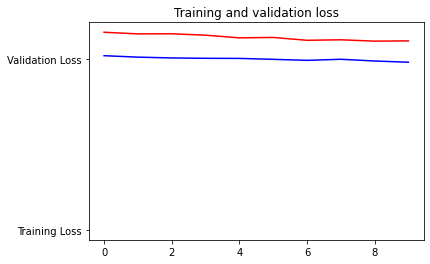

In [28]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-3.h5")